# Prétraitement des données (Data Preprocessing) & Régression

Dans ce TP, nous allons construire des <b>modèles de la régression</b> pour prédire les <b>charges médicaux</b> en utilisant un Dataset d'<b>assurance</b>.

<b>Objectif1 :</b> Les données nécessitent de <b>prétraitement</b> (nettoyage et codage)

<b>Objectif2 :</b> Prévisions d'assurance en utilisant <b><font color='red'>plusieurs algorithmes</font></b> de la <b>régression</b>

<b>Objectif3 :</b> <b><font color='red'>Comparaison</font></b> de ces <b>algorithmes</b>

<b>Lien du Dataset :</b> https://www.kaggle.com/datasets/mirichoi0218/insurance

# 1. Prétraitement des données (Data Preprocessing)

### 1.1. Importer les bibliothèques nécessaires: numpy, matplotlib.pyplot, pandas et seaborn

In [8]:
from time import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2. Importer le dataset

In [9]:
dataset = pd.read_csv('insurance.csv')
dataset.head() # Afficher les 5 première lignes du Dataset

,age,sex,bmi,children,smoker,region,charges
0,NaN,female,27.900,NaN,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,NaN,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


In [10]:
dataset.tail() # Afficher les 5 dernières lignes du Dataset

,age,sex,bmi,children,smoker,region,charges
1333,50.0,male,30.97,3.0,no,northwest,10600.5483
1334,18.0,female,31.92,0.0,no,northeast,2205.9808
1335,18.0,female,36.85,0.0,no,southeast,1629.8335
1336,21.0,female,25.80,0.0,no,southwest,2007.9450
1337,61.0,female,29.07,0.0,yes,northwest,29141.3603


In [11]:
dataset.shape # Toujours commencer par afficher les dimensions du dataset

(1338, 7)

### 1.3. Analyser le dataset

In [12]:
dataset.info() # Informations sur le dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   float64
 1   sex       1338 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   float64
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(4), object(3)
memory usage: 73.3+ KB


In [13]:
dataset.describe() # Statistiques sur le dataset

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1338.000000
mean,39.222139,30.661649,1.095737,13270.422265
std,14.044333,6.100134,1.205571,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.700000,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [14]:
#Numerical features 
dataset.select_dtypes(include=['int64','float64']).columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [15]:
#Categorical features 
dataset.select_dtypes(include=['object']).columns

Index(['sex', 'smoker', 'region'], dtype='object')

### 1.4. Regrouper le dataset par « sexe », « fumeur » et « région ».

In [16]:
dataset_sex = dataset.groupby(by='sex') # par sexe
dataset_sex.mean()

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
dataset_smoker = dataset.groupby(by='smoker') # par smoker
dataset_smoker.mean()

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
dataset_region = dataset.groupby(by='region') # par région
dataset_region.mean()

TypeError: agg function failed [how->mean,dtype->object]

### 1.5. Gérer les données manquantes

In [ ]:
dataset.isnull().values.any() # Vérifier s'il y a des valeurs nulles

True

In [ ]:
dataset.isnull().values.sum() # Vérifier combien de valeurs nulles

3

In [ ]:
#Si il y a des valeurs nulles
dataset.isnull().sum()

age         1
sex         0
bmi         1
children    1
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
#Afficher les features qui contiennent des valeurs nulles
dataset.columns[dataset.isnull().any()]

Index(['age', 'bmi'], dtype='object')

### 1.5.1 Solutions :
<ol>
    
<li> <b>Supprimer</b> les colonnes qui contiennent des nuls (nan) par la commande : <br>    
    <b>dataset.drop(columns=['feature1','feature2',...])</b>
</li>
<li>
Ou <b>remplacer </b> les données manquantes par (<b>mean, most_frequent ou constant</b>) des autres données,
</li>
Pour plus de documentation sur :
    
https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

</ol>

### Par exemple s'il y a des données manquantes dans la colonne (children), remplacer les par most_frequent

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
imputer.fit(dataset.iloc[:, 3:4])#colonne (children)
dataset.iloc[:, 3:4] = imputer.transform(dataset.iloc[:, 3:4])
dataset.iloc[:, 3:4]

,children
0,0.0
1,1.0
2,3.0
3,0.0
4,0.0
...,...
1333,3.0
1334,0.0
1335,0.0
1336,0.0


### Si constant, ajouter l'atrribut fill_value, par exemple la colonne age

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy="constant", fill_value= 1)
imputer.fit(dataset.iloc[:, 0:1])#colonne (age)
dataset.iloc[:, 0:1] = imputer.transform(dataset.iloc[:, 0:1])
dataset.iloc[:, 0:1]

,age
0,1.0
1,18.0
2,28.0
3,33.0
4,32.0
...,...
1333,50.0
1334,18.0
1335,18.0
1336,21.0


### Si mean, par exemple la colonne bmi

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
imputer.fit(dataset.iloc[:, 2:3])#colonne (bmi)
dataset.iloc[:, 2:3] = imputer.transform(dataset.iloc[:, 2:3])
dataset.iloc[:, 2:3]

,bmi
0,27.900000
1,33.770000
2,30.661649
3,22.705000
4,28.880000
...,...
1333,30.970000
1334,31.920000
1335,36.850000
1336,25.800000


In [ ]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,1.0,female,27.900000,0.0,yes,southwest,16884.92400
1,18.0,male,33.770000,1.0,no,southeast,1725.55230
2,28.0,male,30.661649,3.0,no,southeast,4449.46200
3,33.0,male,22.705000,0.0,no,northwest,21984.47061
4,32.0,male,28.880000,0.0,no,northwest,3866.85520


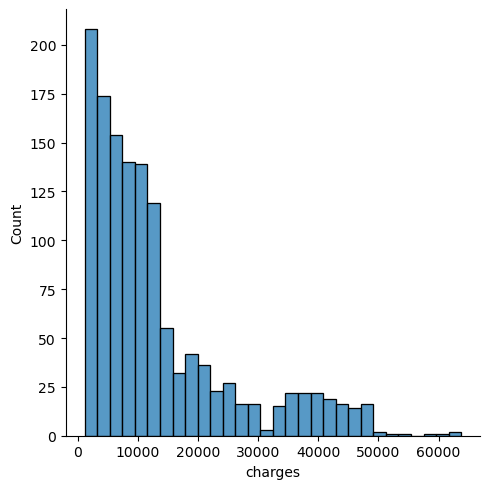

In [ ]:
# Afficher target
bar = sns.displot(dataset['charges'])

### 1.6. Codage des variables catégorielles

In [ ]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,1.0,female,27.900000,0.0,yes,southwest,16884.92400
1,18.0,male,33.770000,1.0,no,southeast,1725.55230
2,28.0,male,30.661649,3.0,no,southeast,4449.46200
3,33.0,male,22.705000,0.0,no,northwest,21984.47061
4,32.0,male,28.880000,0.0,no,northwest,3866.85520


In [ ]:
dataset.select_dtypes(include='object').columns # afficher les données catégorielles

Index(['sex', 'smoker', 'region'], dtype='object')

In [ ]:
dataset['sex'].unique() #vérifier les valeurs uniques dans la colonne 'sex'

array(['female', 'male'], dtype=object)

In [ ]:
dataset['smoker'].unique() #vérifier les valeurs uniques dans la colonne 'smoker'

array(['yes', 'no'], dtype=object)

In [ ]:
dataset['region'].unique() #vérifier les valeurs uniques dans la colonne 'region'

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

### 1.7. Convertir les données catégorielles en variables fictives ou indicatrices.

In [ ]:
dataset = pd.get_dummies(data=dataset, drop_first=True)

In [ ]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,1.0,27.900000,0.0,16884.92400,False,True,False,False,True
1,18.0,33.770000,1.0,1725.55230,True,False,False,True,False
2,28.0,30.661649,3.0,4449.46200,True,False,False,True,False
3,33.0,22.705000,0.0,21984.47061,True,False,True,False,False
4,32.0,28.880000,0.0,3866.85520,True,False,True,False,False


In [ ]:
dataset.shape # afficher les nouvelles dimensions du dataset

(1338, 9)

### 1.8. Matrice de corrélation & Heatmap

In [ ]:
dataset_2 = dataset.drop(columns='charges')
dataset_2.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,1.0,27.900000,0.0,False,True,False,False,True
1,18.0,33.770000,1.0,True,False,False,True,False
2,28.0,30.661649,3.0,True,False,False,True,False
3,33.0,22.705000,0.0,True,False,True,False,False
4,32.0,28.880000,0.0,True,False,True,False,False


<Axes: title={'center': 'Correlation avec les charges'}>

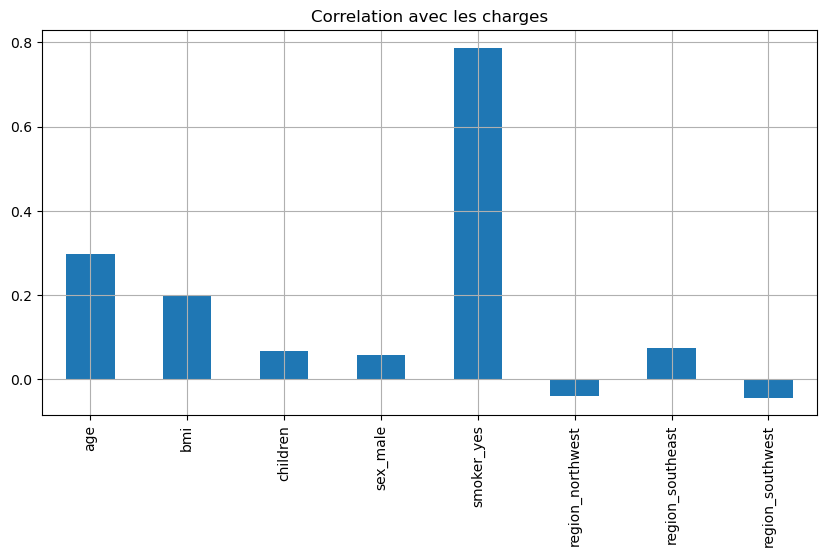

In [ ]:
dataset_2.corrwith(dataset['charges']).plot.bar(figsize=(10,5), title = 'Correlation avec les charges', 
                                                rot = 90, grid = True)

#### Remarques sur le diagramme:

Le diagramme montre que le <b>(feature smoker_yes)</b> est fortement corrélé <b>(liée)</b> avec les <b>charges</b>

et le <b>(feature age)</b> est <b>moyennement</b> corrélé avec les <b>charges</b>

et les autres (features) <b>faible</b> corrélation

In [ ]:
corr = dataset.corr() # Créer la matrice de correlation
corr

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.109722,0.043253,0.298129,-0.019848,-0.026853,0.000135,-0.011034,0.008309
bmi,0.109722,1.000000,0.012306,0.198561,0.046090,0.003896,-0.135841,0.269570,-0.006043
children,0.043253,0.012306,1.000000,0.067998,0.017163,0.007673,0.024806,-0.023066,0.021914
charges,0.298129,0.198561,0.067998,1.000000,0.057292,0.787251,-0.039905,0.073982,-0.043210
sex_male,-0.019848,0.046090,0.017163,0.057292,1.000000,0.076185,-0.011156,0.017117,-0.004184
smoker_yes,-0.026853,0.003896,0.007673,0.787251,0.076185,1.000000,-0.036945,0.068498,-0.036945
region_northwest,0.000135,-0.135841,0.024806,-0.039905,-0.011156,-0.036945,1.000000,-0.346265,-0.320829
region_southeast,-0.011034,0.269570,-0.023066,0.073982,0.017117,0.068498,-0.346265,1.000000,-0.346265
region_southwest,0.008309,-0.006043,0.021914,-0.043210,-0.004184,-0.036945,-0.320829,-0.346265,1.000000


<Axes: >

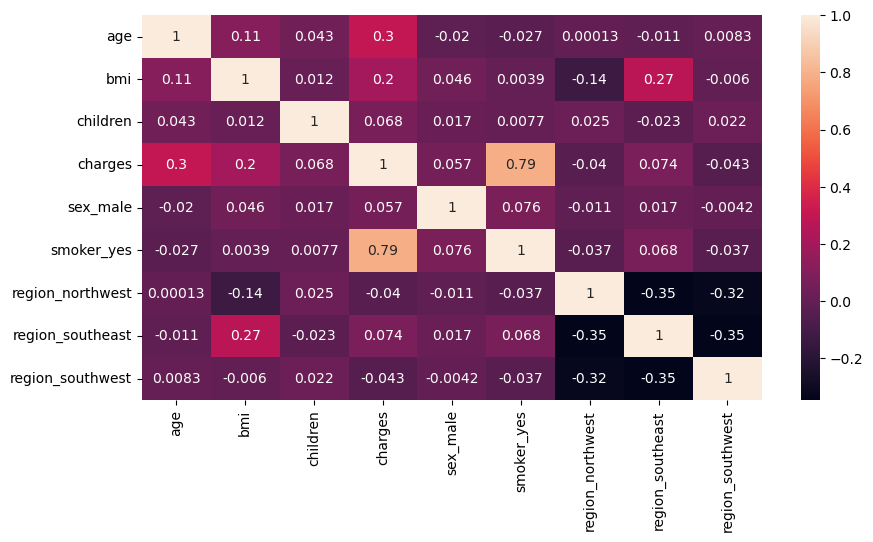

In [ ]:
# Matrice de correlation & Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(data = corr, annot=True)

In [ ]:
#Afficher les features de haute correlation
corr.index[abs(corr['charges'])>0.5]

Index(['charges', 'smoker_yes'], dtype='object')

### 1.9. Diviser (Split) Dataset

In [ ]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,1.0,27.900000,0.0,16884.92400,False,True,False,False,True
1,18.0,33.770000,1.0,1725.55230,True,False,False,True,False
2,28.0,30.661649,3.0,4449.46200,True,False,False,True,False
3,33.0,22.705000,0.0,21984.47061,True,False,True,False,False
4,32.0,28.880000,0.0,3866.85520,True,False,True,False,False


In [ ]:
# features
X = dataset.drop(columns='charges')

In [ ]:
# target
y = dataset['charges']

### 1.10. Training & Testing Dataset

Pour plus de documentation sur (<b>Split Dataset</b>) : https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

In [ ]:
#Dimensions du Dataset
print(f' Dimensions de X_train : {X_train.shape}')
print(f' Dimensions de y_train : {y_train.shape}')
print(f' Dimensions de X_test : {X_test.shape}')
print(f' Dimensions de y_test : {y_test.shape}')

 Dimensions de X_train : (936, 8)
 Dimensions de y_train : (936,)
 Dimensions de X_test : (402, 8)
 Dimensions de y_test : (402,)


### 1.11. Normalisation (Scaling) des (features)
Pour plus de documentation sur <b>(Scaling) des (features)</b> : https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train, X_test = scaler.fit_transform(X_train), scaler.transform(X_test)

In [ ]:
X_train

array([[-1.52731878, -0.40676193, -0.89833872, ..., -0.56089816,
        -0.61852256, -0.58228498],
       [-0.0321757 ,  0.32897787, -0.89833872, ..., -0.56089816,
        -0.61852256,  1.71737215],
       [ 0.89338907,  2.56748827,  3.25603402, ..., -0.56089816,
         1.61675589, -0.58228498],
       ...,
       [ 0.03902159, -0.90982502, -0.89833872, ..., -0.56089816,
         1.61675589, -0.58228498],
       [-1.45612149,  0.76705195, -0.89833872, ...,  1.78285485,
        -0.61852256, -0.58228498],
       [-0.45935944, -1.96569587, -0.06746417, ..., -0.56089816,
        -0.61852256,  1.71737215]])

In [ ]:
X_test

array([[ 0.89338907, -0.08823554, -0.06746417, ..., -0.56089816,
        -0.61852256,  1.71737215],
       [ 0.53740262, -0.22142289, -0.06746417, ..., -0.56089816,
         1.61675589, -0.58228498],
       [ 0.60859991,  1.57500176,  0.76341038, ...,  1.78285485,
        -0.61852256, -0.58228498],
       ...,
       [ 1.10698093,  1.20833536, -0.89833872, ..., -0.56089816,
         1.61675589, -0.58228498],
       [ 1.74775654,  1.34954606, -0.06746417, ..., -0.56089816,
         1.61675589, -0.58228498],
       [ 1.60536196, -0.92266235, -0.89833872, ..., -0.56089816,
        -0.61852256,  1.71737215]])

# 2. Régression

### 2.1 Régression linéaire

Pour plus de documentation sur la <b>Régression linéaire</b> : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

### 2.2. Générer le Modèle
$f(x) = a_i \times X_i + b$

In [ ]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
t0=time()
model1.fit(X_train, y_train)
t1=time()
print("LinearRegression:",t1-t0,'s')

LinearRegression: 0.008930206298828125 s


Affchier les <b>coefficients<b> a et b du modèle f(x):
$f(x) = a_i \times X_i + b$
$f(x) = a_1 \times age + a_2 \times bmi + a_3 \times children + a_4 \times sex\_male + a_5 \times smoker\_yes + a_6 \times region\_northwest + a_7 \times region\_southeast + a_8 \times region\_southwest + b$

In [ ]:
print('a_i = ', model1.coef_)
print('b = ', model1.intercept_)

a_i =  [3599.88733979 2089.18159064  565.47107668  -28.20273491 9436.64314944
 -239.48767613 -443.91062922 -338.45875536]
b =  13232.916467179488


### 2.3. Tester le Modèle
Pour plus de documentation sur comment tester le modèle tel que le <b>coefficient de détermination</b> : https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics

In [ ]:
y_pred = model1.pfrom sklearn.linear_model import LinearRegression
redict(X_test)

In [ ]:
model1.score(X_test,y_test)

0.7909681282487327

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7909681282487327

### 2.4. Random Forest Regression
Pour plus de documentation sur <b> Random Forest Regression</b> : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor()
t0=time()
model2.fit(X_train, y_train)
t1=time()
print("RandomForestRegressor:",t1-t0,'s')

RandomForestRegressor: 0.5265443325042725 s


In [ ]:
y_pred = model2.predict(X_test)

In [ ]:
model2.score(X_test,y_test)

0.8595485407378587

# <font color = 'red'>3. Autres algorithmes de la régression </font><font color = 'blue'>(Comparaison)</font>

In [ ]:
from sklearn.linear_model import LinearRegression,SGDRegressor,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_absolute_error,mean_squared_error,median_absolute_error 

LinearRegressionModel = LinearRegression(fit_intercept=True, copy_X=True,n_jobs=-1)
SGDRegressionModel = SGDRegressor(alpha=0.1,random_state=33,penalty='l2',loss = 'huber')
LassoRegressionModel = Lasso(alpha=1.0,random_state=33)
RidgeRegressionModel = Ridge(alpha=1.0,random_state=33)
RandomForestRegressorModel = RandomForestRegressor(n_estimators=1000,max_depth=8, random_state=33)
GBRModel = GradientBoostingRegressor(n_estimators=500,max_depth=7,learning_rate = 1.5 ,random_state=33)
SVRModel = SVR(C = 1.0 ,epsilon=0.1,kernel = 'rbf') 
DecisionTreeRegressorModel = DecisionTreeRegressor( max_depth=3,random_state=33)
KNeighborsRegressorModel = KNeighborsRegressor(n_neighbors = 5, weights='uniform',algorithm = 'auto') 

Models = [LinearRegressionModel,SGDRegressionModel,LassoRegressionModel,RidgeRegressionModel,RandomForestRegressorModel,
          GBRModel,SVRModel,DecisionTreeRegressorModel,KNeighborsRegressorModel]


for Model in Models : 
    print(f'for Model {str(Model).split("(")[0]}')
    t0=time()
    Model.fit(X_train, y_train)
    t1=time()
    print("fit time:",t1-t0,'s')   
    y_pred = Model.predict(X_test)
    print(f'Coefficient de détermination value is  : {Model.score(X_test,y_test)}')
    print(f'MAE value is  : {mean_absolute_error(y_test, y_pred)}')
    print(f'MSE value is  : {mean_squared_error(y_test, y_pred)}')
    print(f'MdSE value is  : {median_absolute_error(y_test, y_pred)}')
    print('=================================================')

for Model LinearRegression
fit time: 0.002074003219604492 s
Coefficient de détermination value is  : 0.7909681282487327
MAE value is  : 4009.503096146589
MSE value is  : 33334200.77903262
MdSE value is  : 2330.7341633838987
for Model SGDRegressor
fit time: 0.1641247272491455 s
Coefficient de détermination value is  : -1.112182738614123
MAE value is  : 13317.626798223888
MSE value is  : 336828651.54051954
MdSE value is  : 8756.106933352985
for Model Lasso
fit time: 0.0020825862884521484 s
Coefficient de détermination value is  : 0.7909579525141193
MAE value is  : 4009.6256108878238
MSE value is  : 33335823.497988526
MdSE value is  : 2327.6859680445214
for Model Ridge
fit time: 0.0013730525970458984 s
Coefficient de détermination value is  : 0.7908947637334383
MAE value is  : 4011.8179197085615
MSE value is  : 33345900.179044656
MdSE value is  : 2322.3005982978048
for Model RandomForestRegressor


/home/outman/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


fit time: 2.488614797592163 s
Coefficient de détermination value is  : 0.8742050960111883
MAE value is  : 2611.188609054935
MSE value is  : 20060446.052609004
MdSE value is  : 1358.9479888066717
for Model GradientBoostingRegressor
fit time: 0.8261091709136963 s
Coefficient de détermination value is  : 0.4371574325216897
MAE value is  : 6242.416956439572
MSE value is  : 89756203.17667882
MdSE value is  : 3595.957181915923
for Model SVR
fit time: 0.0421295166015625 s
Coefficient de détermination value is  : -0.0861246157514437
MAE value is  : 8685.44059793346
MSE value is  : 173203711.5162501
MdSE value is  : 5100.99930364086
for Model DecisionTreeRegressor
fit time: 0.0012145042419433594 s
Coefficient de détermination value is  : 0.8751026719462079
MAE value is  : 2717.5186267764243
MSE value is  : 19917310.098356172
MdSE value is  : 1836.7065178428866
for Model KNeighborsRegressor
fit time: 0.000865936279296875 s
Coefficient de détermination value is  : 0.8154196502288423
MAE value is 

# 4. Prédiction les charges pour un nouveau client
Soit le client suivant :

<b>Nom : Mohamed, age : 40, sex : 1, bmi : 45,	children : 2, smoker : 1, region : northeast</b>

In [ ]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [ ]:
#Mohamed = [[40, 45, 2, 1, 1, 0, 0, 0]]
Mohamed = [[32, 28.880, 0, 1, 0, 1, 0, 0]]

In [ ]:
#LinearRegression
model1.predict(Mohamed)

array([188497.18526716])

In [ ]:
model1.predict(scaler.transform(Mohamed))

/home/outman/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([5441.53849251])

In [ ]:
#RandomForestRegressor
model2.predict(Mohamed)

array([19837.6459535])

In [ ]:
model2.predict(scaler.transform(Mohamed))

/home/outman/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4093.7557716])

In [ ]:
Fatima = [[19, 27.9, 0, 0, 1, 0, 0, 1]]
model1.predict(Fatima)
model1.predict(scaler.transform(Fatima))

/home/outman/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([25081.48733222])

In [ ]:
model2.predict(Fatima)
model2.predict(scaler.transform(Fatima))

/home/outman/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([17145.0291378])